In [167]:
import pandas as pd
import numpy as np


In [168]:
df=pd.read_csv("C:/Users/User/Documents/data/Product Analytics/ab_test_data.csv")
df.head()
#df.tail()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [169]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [170]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     19998 non-null  object        
 1   timestamp   19998 non-null  datetime64[ns]
 2   test_group  19998 non-null  object        
 3   conversion  19998 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


In [171]:
df['user_dupl']=df['user_id'].duplicated()
test=df.loc[df['user_dupl']==True]
test
#df.info()

,user_id,timestamp,test_group,conversion,user_dupl


In [172]:
test1=df.loc[df['conversion'].isna() ]
test1

,user_id,timestamp,test_group,conversion,user_dupl


## 1. Зчитай дані з файлу та виведи інформацію про результати A/B тесту:

In [173]:
# Кількість користувачів в групах A та B відповідно;

users_a=df[df['test_group']=='a']['user_id'].count()
users_b=df[df['test_group']=='b']['user_id'].count()

print('Number of users in group "a": ', users_a, ' and in group "b": ', users_b )

Number of users in group "a":  10013  and in group "b":  9985


In [174]:
# Кількість конверсій в групах A та B відповідно

group_a=df.loc[df['test_group']=='a']
group_b=df.loc[df['test_group']=='b']

conversions_a=group_a[group_a['conversion']==1]['conversion'].count()
conversions_b=group_b[group_b['conversion']==1]['conversion'].count()

print('Number of conversions in group "a": ', conversions_a, ' and in group "b": ', conversions_b )

Number of conversions in group "a":  611  and in group "b":  889


In [175]:
# The same as above
a=df[df["test_group"] == "a"]["conversion"].sum()
b=df[df["test_group"] == "b"]["conversion"].sum()
a
b

889

In [176]:
# Рівень конверсії в групах A та B відповідно

cr_a=round(conversions_a/users_a,3)
cr_b=round(conversions_b/users_b,3)

print('CR in group "a": ', cr_a, ' and in group "b": ', cr_b )

CR in group "a":  0.061  and in group "b":  0.089


In [177]:
# The same as above
test_cr_a=round(a/users_a,2)
test_cr_a

0.06

In [178]:
# Дату початку та дату кінця тесту, а також тривалість тесту в днях

# start_a=group_a['timestamp'].min()
# end_a=group_a['timestamp'].max()

# start_b=group_b['timestamp'].min()
# end_b=group_b['timestamp'].max()

In [179]:
# Дату початку та дату кінця тесту, а також тривалість тесту в днях

start_a=pd.to_datetime(df[df["test_group"] == "a"]['timestamp']).dt.floor('S').min()
end_a=pd.to_datetime(df[df["test_group"] == "a"]['timestamp']).dt.floor('S').max()

start_b=pd.to_datetime(df[df["test_group"] == "b"]['timestamp']).dt.floor('S').min()
end_b=pd.to_datetime(df[df["test_group"] == "b"]['timestamp']).dt.floor('S').max()



In [180]:
# тривалість тесту в днях
test_duration_a=(end_a-start_a).as_unit('s', round_ok=True)
test_duration_b=(end_b-start_b).as_unit('s', round_ok=True)
print('Test duration in group "a": ', test_duration_a, ' and in group "b": ', test_duration_b )

Test duration in group "a":  21 days 23:55:05  and in group "b":  21 days 23:53:25


In [181]:
test_analysis=pd.DataFrame(
    data={
        'Test_group': ['Control group','Test group'],
        'N of Users': [users_a,users_b],
        'N of Conversions': [conversions_a,conversions_b],
        'CR': [cr_a,cr_b],
        'T_start': [start_a,start_b],
        'T_end': [end_a, end_b],
        'T_duration': [test_duration_a, test_duration_b]
        
    }
)
test_analysis

,Test_group,N of Users,N of Conversions,CR,T_start,T_end,T_duration
0,Control group,10013,611,0.061,2023-07-03 01:46:14,2023-07-25 01:41:19,21 days 23:55:05
1,Test group,9985,889,0.089,2023-07-03 01:42:34,2023-07-25 01:35:59,21 days 23:53:25


In [182]:
#test_analysis.style.background_gradient(axis=None, low=0.75, high=1.0).to_excel("C:/Users/User/Documents/data/Product Analytics/ABtesting.xlsx")

test_analysis.to_clipboard()

In [183]:
test_analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Test_group        2 non-null      object         
 1   N of Users        2 non-null      int64          
 2   N of Conversions  2 non-null      int64          
 3   CR                2 non-null      float64        
 4   T_start           2 non-null      datetime64[ns] 
 5   T_end             2 non-null      datetime64[ns] 
 6   T_duration        2 non-null      timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1), timedelta64[ns](1)
memory usage: 244.0+ bytes


## 2. Обери статистичний критерій для тестування гіпотез та обрахуй значення статистики та p-value. 
Перевір, чи можемо ми відхили нульову гіпотезу. Не забудь уточнити, який критерій використовуєш

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     19998 non-null  object        
 1   timestamp   19998 non-null  datetime64[ns]
 2   test_group  19998 non-null  object        
 3   conversion  19998 non-null  int64         
 4   user_dupl   19998 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 644.6+ KB


In [185]:
df.groupby('test_group')['conversion'].describe()


,count,mean,std,min,25%,50%,75%,max
test_group,,,,,,,,
a,10013.0,0.061021,0.239380,0.0,0.0,0.0,0.0,1.0
b,9985.0,0.089034,0.284806,0.0,0.0,0.0,0.0,1.0


The result of A/B test is a CR from installation to weekly subscription. The population is known, it's CR is 5.8. 
According to Central limit theorem, the distribution of CR values is normal. Two groups which participated in the test cover the entire population for the test period. The audience was split 50:50 randomly, no criteria was applied. The data are boolean, not continuous.    

Therefore, T-test was selected to check statistical significancy of the difference between two independent samples.
**Null hypothesis is** : there is no statistycaly significant difference for CR between two groups
**Alternative** hypothesis is: the difference is significant and we should accept the screen with discount label

In [186]:
from scipy import stats  # пакет в середині пакету

alpha = 0.05  # задаємо рівень значимості

In [187]:
statistic, pvalue = stats.ttest_ind( 
    df[df["test_group"] == "a"]["conversion"],  
    df[df["test_group"] == "b"]["conversion"],  
    alternative="less",  
)

print(f"t-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}")

if pvalue < alpha:
    print("The difference is statistically significant, Null Hypothesis is rejected.")
else:
    print("The difference is insignificant, Null Hypothesis cannot rejected.")

t-statistic: -7.53, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


## 3. Побудуй візуалізацію для порівняння середніх значень у групах з 95% довірчими інтервалами

In [188]:
df["test_group"]=df["test_group"].where(df["test_group"]=="a", other="Test group")
df["test_group"]=df["test_group"].where(df["test_group"]=="Test group", other="Control group")
df["test_group"].head()

0    Control group
1       Test group
2       Test group
3       Test group
4       Test group
Name: test_group, dtype: object

In [163]:
df["test_group"].head()

0    Control group
1       Test group
2       Test group
3       Test group
4       Test group
Name: test_group, dtype: object

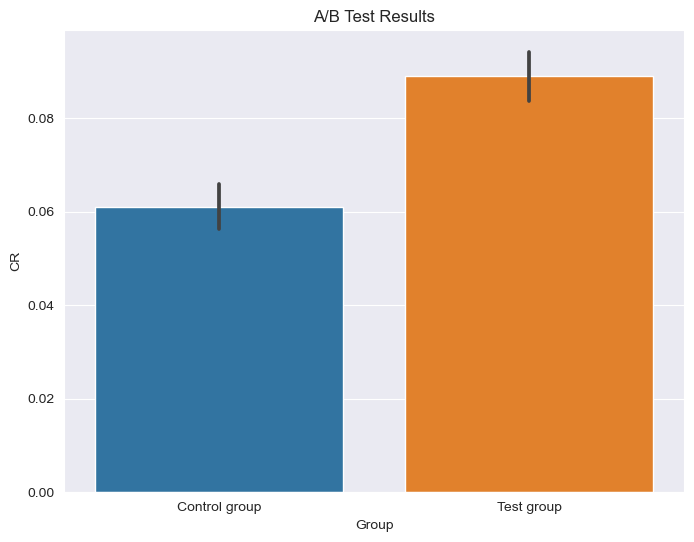

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.barplot(
    x=df["test_group"], y=df["conversion"], errorbar=("ci", 95)
)  # Confidence Intervals

plt.title("A/B Test Results")
plt.xlabel("Group")
plt.ylabel("CR")

plt.show()

In [190]:
df_sorted = df.sort_values('timestamp')
df_sorted

,user_id,timestamp,test_group,conversion,user_dupl
3065,46c4595c-7381-4735-9557-eefe48f16348,2023-07-03 01:42:34.033708,Test group,0,False
6667,974b78bf-8483-4f6a-8a8b-95f9bce0226d,2023-07-03 01:46:14.688840,Control group,0,False
15979,5f142100-99a4-418b-aa9d-eea849efa926,2023-07-03 01:49:43.283638,Test group,0,False
714,f685ef7f-f5d3-4a7c-b4f2-706c8f5f128f,2023-07-03 01:49:54.067114,Control group,0,False
2391,706d58f2-2bce-4137-8aa8-20f32db23e45,2023-07-03 01:52:14.910970,Control group,0,False
...,...,...,...,...,...
3597,89d49fcc-afd1-4afb-ac0d-9a126fb42ea9,2023-07-25 01:32:16.247402,Test group,0,False
1497,7df2c3a5-2bd7-4b21-8917-9c8df7ddfd3a,2023-07-25 01:32:28.813474,Test group,0,False
7936,1855b5fa-213d-4dad-ac48-feacd99e1214,2023-07-25 01:33:59.165132,Test group,1,False
8825,476663be-ceb3-4783-b328-50e6b8c4256b,2023-07-25 01:35:59.130658,Test group,1,False


## Побудуй графік, що відображатиме зміну конверсії в часі. 
І не забувай врахувати, що на цей раз в нас дійсно є дані про час здійснення івенту.

In [ ]:
start_a
end_a
date=pd.date_range(start_a,end_a,freq='D' )
l=len(date)
l

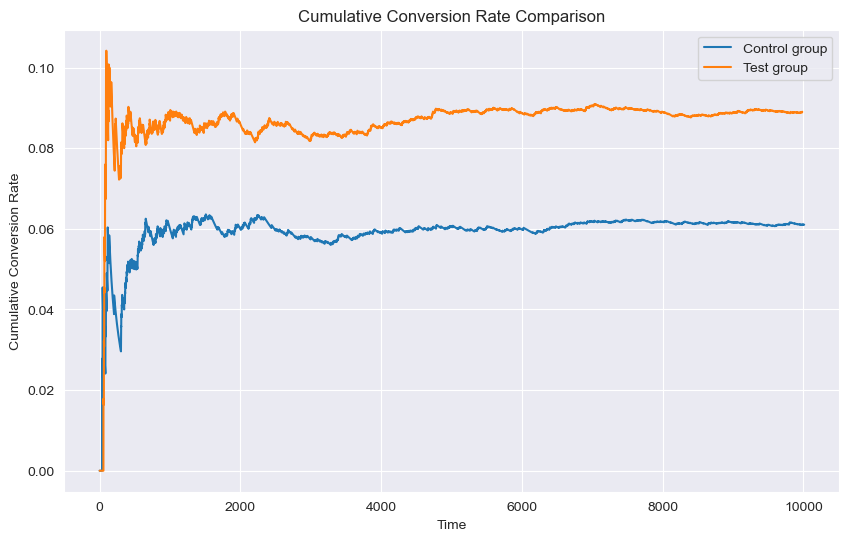

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('timestamp')

# Рахуємо кумулятивне середнє - це і є зміна конверсії з плином часу
cumulative_metric_a = df_sorted[df_sorted['test_group'] == 'Control group']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = df_sorted[df_sorted['test_group'] == 'Test group']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='Control group')
plt.plot(cumulative_metric_b, label='Test group')

plt.title('Cumulative Сonversion Rate Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Сonversion Rate')

plt.legend()
plt.show()